In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
import optuna
from sklearn.model_selection import cross_val_score

c:\Users\ACER\anaconda3\envs\songPopularity\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cols = ["artist_avg_popularity", "artist_high_pop_ratio", "playlist_count", "playlist_count_final", "album_age", "album_age_log", "artist_song_count_final",
"tempo", "subgenre_hip hop", "subgenre_post-teen pop", "instrumentalness", "duration_ms", "subgenre_reggaeton", "subgenre_electropop", "subgenre_hip pop", "subgenre_tropical",
"subgenre_dance pop", "subgenre_permanent wave", "acousticness", "subgenre_electro house", "subgenre_hard rock","subgenre_big room", "subgenre_trap"]

df = pd.read_csv("final_data.csv")

In [3]:
X = df.drop(columns=["popularity"])[cols]
y = df["popularity"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
param_grid = {
    "max_depth": [4, 6, 8],
    "learning_rate": [0.03, 0.06, 0.1],
    "min_child_weight": [5, 10],
    "subsample": [0.6, 0.8],
    "colsample_bytree": [0.6, 0.8],
    "n_estimators": [300, 500]
}

xgb_base = XGBRegressor(
    objective="reg:squarederror",
    eval_metric="mae",
    random_state=42,
    n_jobs=-1
)

grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("GridSearch best params:", grid.best_params_)
print("GridSearch best MAE:", -grid.best_score_)

GridSearch best params: {'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 10, 'n_estimators': 300, 'subsample': 0.8}
GridSearch best MAE: 9.989142735799154


In [6]:
best_grid = grid.best_params_
best_grid

{'colsample_bytree': 0.8,
 'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 10,
 'n_estimators': 300,
 'subsample': 0.8}

In [ ]:

def objective(trial):

    params = {
        "max_depth": trial.suggest_int("max_depth", best_grid["max_depth"]-2, best_grid["max_depth"]+2),
        "learning_rate": trial.suggest_float("learning_rate", best_grid["learning_rate"]/2, best_grid["learning_rate"]*1.5),
        "min_child_weight": trial.suggest_int("min_child_weight", best_grid["min_child_weight"]//2, best_grid["min_child_weight"]*2),
        "subsample": trial.suggest_float("subsample", best_grid["subsample"]-0.2, best_grid["subsample"]+0.2),
        "colsample_bytree": trial.suggest_float("colsample_bytree", best_grid["colsample_bytree"]-0.2, best_grid["colsample_bytree"]+0.2),
        "n_estimators": trial.suggest_int("n_estimators", best_grid["n_estimators"]-200, best_grid["n_estimators"]+300),
        "objective": "reg:squarederror",
        "eval_metric": "mae",
        "random_state": 42,
        "n_jobs": -1
    }

    model = XGBRegressor(**params)

    score = cross_val_score(
        model, X_train, y_train,
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1
    ).mean()

    return -score

In [8]:
best_grid = grid.best_params_

In [11]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=40, show_progress_bar=True)

[I 2025-12-10 00:30:56,202] A new study created in memory with name: no-name-4188f349-2275-4bea-b02b-e8ca46887960
Best trial: 0. Best value: 228.433:   2%|▎         | 1/40 [00:02<01:39,  2.55s/it]

[I 2025-12-10 00:30:58,746] Trial 0 finished with value: 228.43327941894532 and parameters: {'max_depth': 8, 'learning_rate': 0.018691472872930402, 'min_child_weight': 20, 'subsample': 0.8224871598528334, 'colsample_bytree': 0.903626435394395, 'n_estimators': 600}. Best is trial 0 with value: 228.43327941894532.


Best trial: 1. Best value: 225.251:   5%|▌         | 2/40 [00:03<00:54,  1.42s/it]

[I 2025-12-10 00:30:59,383] Trial 1 finished with value: 225.25116882324218 and parameters: {'max_depth': 4, 'learning_rate': 0.027693825793194692, 'min_child_weight': 15, 'subsample': 0.894248465347091, 'colsample_bytree': 0.9301293740923122, 'n_estimators': 203}. Best is trial 1 with value: 225.25116882324218.


Best trial: 2. Best value: 223.193:   8%|▊         | 3/40 [00:03<00:42,  1.14s/it]

[I 2025-12-10 00:31:00,182] Trial 2 finished with value: 223.19314270019532 and parameters: {'max_depth': 6, 'learning_rate': 0.03942541065384681, 'min_child_weight': 20, 'subsample': 0.6576944128697393, 'colsample_bytree': 0.9326921938704358, 'n_estimators': 186}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  10%|█         | 4/40 [00:04<00:37,  1.05s/it]

[I 2025-12-10 00:31:01,087] Trial 3 finished with value: 237.4067810058594 and parameters: {'max_depth': 8, 'learning_rate': 0.01618440215603983, 'min_child_weight': 5, 'subsample': 0.9059022457850728, 'colsample_bytree': 0.8017008540300133, 'n_estimators': 121}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  12%|█▎        | 5/40 [00:06<00:40,  1.16s/it]

[I 2025-12-10 00:31:02,462] Trial 4 finished with value: 226.67678833007812 and parameters: {'max_depth': 6, 'learning_rate': 0.034549658460727245, 'min_child_weight': 11, 'subsample': 0.9603447091160086, 'colsample_bytree': 0.9156820465979789, 'n_estimators': 440}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  15%|█▌        | 6/40 [00:07<00:43,  1.28s/it]

[I 2025-12-10 00:31:03,979] Trial 5 finished with value: 224.18491821289064 and parameters: {'max_depth': 6, 'learning_rate': 0.016504207367042313, 'min_child_weight': 6, 'subsample': 0.8542575039721227, 'colsample_bytree': 0.7457739211208246, 'n_estimators': 438}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  18%|█▊        | 7/40 [00:09<00:46,  1.41s/it]

[I 2025-12-10 00:31:05,657] Trial 6 finished with value: 228.46156616210936 and parameters: {'max_depth': 7, 'learning_rate': 0.03364090366119729, 'min_child_weight': 18, 'subsample': 0.9984732439787753, 'colsample_bytree': 0.709478870477179, 'n_estimators': 499}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  20%|██        | 8/40 [00:10<00:42,  1.33s/it]

[I 2025-12-10 00:31:06,808] Trial 7 finished with value: 224.63702697753905 and parameters: {'max_depth': 6, 'learning_rate': 0.03133855031867806, 'min_child_weight': 11, 'subsample': 0.7139944647739512, 'colsample_bytree': 0.7201326135794709, 'n_estimators': 330}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  22%|██▎       | 9/40 [00:11<00:35,  1.13s/it]

[I 2025-12-10 00:31:07,503] Trial 8 finished with value: 223.337451171875 and parameters: {'max_depth': 5, 'learning_rate': 0.04131869913650818, 'min_child_weight': 19, 'subsample': 0.9545421650612395, 'colsample_bytree': 0.9822611945907086, 'n_estimators': 203}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  25%|██▌       | 10/40 [00:12<00:30,  1.02s/it]

[I 2025-12-10 00:31:08,263] Trial 9 finished with value: 223.5836151123047 and parameters: {'max_depth': 5, 'learning_rate': 0.039471706777670965, 'min_child_weight': 7, 'subsample': 0.6635921855382781, 'colsample_bytree': 0.7129482357012296, 'n_estimators': 188}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  28%|██▊       | 11/40 [00:12<00:27,  1.06it/s]

[I 2025-12-10 00:31:09,049] Trial 10 finished with value: 224.1228057861328 and parameters: {'max_depth': 4, 'learning_rate': 0.04469204198419182, 'min_child_weight': 15, 'subsample': 0.6122904807372298, 'colsample_bytree': 0.6000181247674261, 'n_estimators': 281}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  30%|███       | 12/40 [00:13<00:25,  1.10it/s]

[I 2025-12-10 00:31:09,864] Trial 11 finished with value: 223.3293884277344 and parameters: {'max_depth': 5, 'learning_rate': 0.04491006762512959, 'min_child_weight': 20, 'subsample': 0.745256677040842, 'colsample_bytree': 0.9993925427969027, 'n_estimators': 232}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  32%|███▎      | 13/40 [00:14<00:21,  1.28it/s]

[I 2025-12-10 00:31:10,367] Trial 12 finished with value: 225.0890655517578 and parameters: {'max_depth': 5, 'learning_rate': 0.03863158566339593, 'min_child_weight': 16, 'subsample': 0.744521830636771, 'colsample_bytree': 0.9907167646661306, 'n_estimators': 108}. Best is trial 2 with value: 223.19314270019532.


Best trial: 2. Best value: 223.193:  35%|███▌      | 14/40 [00:15<00:22,  1.14it/s]

[I 2025-12-10 00:31:11,462] Trial 13 finished with value: 227.5361083984375 and parameters: {'max_depth': 7, 'learning_rate': 0.04365349386491518, 'min_child_weight': 17, 'subsample': 0.7529060043385735, 'colsample_bytree': 0.8542324160162489, 'n_estimators': 271}. Best is trial 2 with value: 223.19314270019532.


Best trial: 14. Best value: 222.661:  38%|███▊      | 15/40 [00:16<00:21,  1.14it/s]

[I 2025-12-10 00:31:12,340] Trial 14 finished with value: 222.66144104003905 and parameters: {'max_depth': 5, 'learning_rate': 0.02561431711760844, 'min_child_weight': 20, 'subsample': 0.6772757265866932, 'colsample_bytree': 0.9978651278689735, 'n_estimators': 265}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  40%|████      | 16/40 [00:17<00:25,  1.06s/it]

[I 2025-12-10 00:31:13,839] Trial 15 finished with value: 225.10561828613282 and parameters: {'max_depth': 7, 'learning_rate': 0.02392334904513922, 'min_child_weight': 13, 'subsample': 0.6265154764871116, 'colsample_bytree': 0.8574293686416528, 'n_estimators': 365}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  42%|████▎     | 17/40 [00:18<00:21,  1.08it/s]

[I 2025-12-10 00:31:14,438] Trial 16 finished with value: 228.0991424560547 and parameters: {'max_depth': 4, 'learning_rate': 0.024609923463530546, 'min_child_weight': 18, 'subsample': 0.6589521149830019, 'colsample_bytree': 0.9454207952953625, 'n_estimators': 157}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  45%|████▌     | 18/40 [00:19<00:21,  1.04it/s]

[I 2025-12-10 00:31:15,484] Trial 17 finished with value: 223.0419708251953 and parameters: {'max_depth': 5, 'learning_rate': 0.02178715535673504, 'min_child_weight': 13, 'subsample': 0.68330880053522, 'colsample_bytree': 0.8651778986245464, 'n_estimators': 326}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  48%|████▊     | 19/40 [00:20<00:21,  1.01s/it]

[I 2025-12-10 00:31:16,619] Trial 18 finished with value: 223.24472045898438 and parameters: {'max_depth': 5, 'learning_rate': 0.021065193404063997, 'min_child_weight': 9, 'subsample': 0.6983478945685228, 'colsample_bytree': 0.8593277006576253, 'n_estimators': 345}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  50%|█████     | 20/40 [00:21<00:20,  1.04s/it]

[I 2025-12-10 00:31:17,724] Trial 19 finished with value: 223.57131652832032 and parameters: {'max_depth': 4, 'learning_rate': 0.02724863602443541, 'min_child_weight': 13, 'subsample': 0.7826443905657119, 'colsample_bytree': 0.7907915759176425, 'n_estimators': 425}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  52%|█████▎    | 21/40 [00:22<00:18,  1.01it/s]

[I 2025-12-10 00:31:18,599] Trial 20 finished with value: 224.2359832763672 and parameters: {'max_depth': 5, 'learning_rate': 0.02138950166245492, 'min_child_weight': 9, 'subsample': 0.6968080864299301, 'colsample_bytree': 0.6592642493218894, 'n_estimators': 272}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  55%|█████▌    | 22/40 [00:23<00:19,  1.08s/it]

[I 2025-12-10 00:31:19,897] Trial 21 finished with value: 223.62167663574218 and parameters: {'max_depth': 6, 'learning_rate': 0.028999480384525527, 'min_child_weight': 18, 'subsample': 0.652547323348579, 'colsample_bytree': 0.9477585319900402, 'n_estimators': 318}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  57%|█████▊    | 23/40 [00:24<00:17,  1.06s/it]

[I 2025-12-10 00:31:20,892] Trial 22 finished with value: 223.09543151855468 and parameters: {'max_depth': 6, 'learning_rate': 0.024244393476078135, 'min_child_weight': 20, 'subsample': 0.6044183747268169, 'colsample_bytree': 0.8881100427678505, 'n_estimators': 260}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  60%|██████    | 24/40 [00:26<00:18,  1.14s/it]

[I 2025-12-10 00:31:22,221] Trial 23 finished with value: 222.90603942871093 and parameters: {'max_depth': 5, 'learning_rate': 0.02450562785299356, 'min_child_weight': 15, 'subsample': 0.6014351079672754, 'colsample_bytree': 0.8766140191317797, 'n_estimators': 396}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  62%|██████▎   | 25/40 [00:27<00:18,  1.23s/it]

[I 2025-12-10 00:31:23,659] Trial 24 finished with value: 223.49439086914063 and parameters: {'max_depth': 5, 'learning_rate': 0.02155898509068573, 'min_child_weight': 14, 'subsample': 0.6338906676627203, 'colsample_bytree': 0.8158805836306995, 'n_estimators': 396}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  65%|██████▌   | 26/40 [00:28<00:17,  1.27s/it]

[I 2025-12-10 00:31:25,039] Trial 25 finished with value: 223.22911987304687 and parameters: {'max_depth': 4, 'learning_rate': 0.02606870904577213, 'min_child_weight': 11, 'subsample': 0.691331963350468, 'colsample_bytree': 0.8345067477518647, 'n_estimators': 484}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  68%|██████▊   | 27/40 [00:30<00:16,  1.28s/it]

[I 2025-12-10 00:31:26,338] Trial 26 finished with value: 223.59473876953126 and parameters: {'max_depth': 5, 'learning_rate': 0.030845710095736677, 'min_child_weight': 16, 'subsample': 0.7292653030507649, 'colsample_bytree': 0.7679295640111022, 'n_estimators': 389}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  70%|███████   | 28/40 [00:31<00:14,  1.21s/it]

[I 2025-12-10 00:31:27,363] Trial 27 finished with value: 223.3749206542969 and parameters: {'max_depth': 5, 'learning_rate': 0.018749705605599208, 'min_child_weight': 12, 'subsample': 0.6763170924159738, 'colsample_bytree': 0.871593060131595, 'n_estimators': 312}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  72%|███████▎  | 29/40 [00:32<00:13,  1.26s/it]

[I 2025-12-10 00:31:28,746] Trial 28 finished with value: 222.696044921875 and parameters: {'max_depth': 4, 'learning_rate': 0.02247284775546589, 'min_child_weight': 9, 'subsample': 0.780716162147134, 'colsample_bytree': 0.9660530897793576, 'n_estimators': 508}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  75%|███████▌  | 30/40 [00:34<00:13,  1.32s/it]

[I 2025-12-10 00:31:30,200] Trial 29 finished with value: 223.17664184570313 and parameters: {'max_depth': 4, 'learning_rate': 0.01874344415350102, 'min_child_weight': 10, 'subsample': 0.8089377064611228, 'colsample_bytree': 0.9720925690710187, 'n_estimators': 583}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  78%|███████▊  | 31/40 [00:35<00:12,  1.34s/it]

[I 2025-12-10 00:31:31,582] Trial 30 finished with value: 223.40728454589845 and parameters: {'max_depth': 4, 'learning_rate': 0.02582402666571071, 'min_child_weight': 8, 'subsample': 0.7712718392176721, 'colsample_bytree': 0.8898293366115073, 'n_estimators': 547}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  80%|████████  | 32/40 [00:36<00:10,  1.37s/it]

[I 2025-12-10 00:31:33,037] Trial 31 finished with value: 223.50706787109374 and parameters: {'max_depth': 5, 'learning_rate': 0.02272596687626845, 'min_child_weight': 14, 'subsample': 0.836306199552302, 'colsample_bytree': 0.9040767520880602, 'n_estimators': 496}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  82%|████████▎ | 33/40 [00:38<00:09,  1.40s/it]

[I 2025-12-10 00:31:34,505] Trial 32 finished with value: 222.92774047851563 and parameters: {'max_depth': 4, 'learning_rate': 0.020253353960903466, 'min_child_weight': 12, 'subsample': 0.6285626370035156, 'colsample_bytree': 0.960468569359228, 'n_estimators': 538}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  85%|████████▌ | 34/40 [00:39<00:08,  1.40s/it]

[I 2025-12-10 00:31:35,909] Trial 33 finished with value: 223.1732971191406 and parameters: {'max_depth': 4, 'learning_rate': 0.020090902672835642, 'min_child_weight': 9, 'subsample': 0.633735944276693, 'colsample_bytree': 0.9607171297821344, 'n_estimators': 534}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  88%|████████▊ | 35/40 [00:41<00:07,  1.44s/it]

[I 2025-12-10 00:31:37,436] Trial 34 finished with value: 223.22734985351562 and parameters: {'max_depth': 4, 'learning_rate': 0.028733935677961633, 'min_child_weight': 12, 'subsample': 0.6128300428662539, 'colsample_bytree': 0.9285242643902896, 'n_estimators': 574}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  90%|█████████ | 36/40 [00:42<00:05,  1.49s/it]

[I 2025-12-10 00:31:39,053] Trial 35 finished with value: 223.33030700683594 and parameters: {'max_depth': 4, 'learning_rate': 0.015534882993097923, 'min_child_weight': 7, 'subsample': 0.6425010707594857, 'colsample_bytree': 0.9657394423500805, 'n_estimators': 472}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  92%|█████████▎| 37/40 [00:44<00:04,  1.47s/it]

[I 2025-12-10 00:31:40,487] Trial 36 finished with value: 223.420556640625 and parameters: {'max_depth': 4, 'learning_rate': 0.025935182911677877, 'min_child_weight': 10, 'subsample': 0.8633901604517096, 'colsample_bytree': 0.9433528959011408, 'n_estimators': 534}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  95%|█████████▌| 38/40 [00:46<00:03,  1.85s/it]

[I 2025-12-10 00:31:43,199] Trial 37 finished with value: 228.16250915527343 and parameters: {'max_depth': 8, 'learning_rate': 0.017810217531260754, 'min_child_weight': 5, 'subsample': 0.8928600182047932, 'colsample_bytree': 0.9255602761305326, 'n_estimators': 450}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661:  98%|█████████▊| 39/40 [00:48<00:01,  1.75s/it]

[I 2025-12-10 00:31:44,735] Trial 38 finished with value: 223.09808349609375 and parameters: {'max_depth': 4, 'learning_rate': 0.023572815064876, 'min_child_weight': 15, 'subsample': 0.6011204585893686, 'colsample_bytree': 0.9117235546821983, 'n_estimators': 512}. Best is trial 14 with value: 222.66144104003905.


Best trial: 14. Best value: 222.661: 100%|██████████| 40/40 [00:50<00:00,  1.26s/it]

[I 2025-12-10 00:31:46,761] Trial 39 finished with value: 224.43276672363282 and parameters: {'max_depth': 6, 'learning_rate': 0.01715046986775929, 'min_child_weight': 10, 'subsample': 0.7188764955859694, 'colsample_bytree': 0.9789062214445757, 'n_estimators': 599}. Best is trial 14 with value: 222.66144104003905.


In [12]:
best_params = study.best_params
best_params

{'max_depth': 5,
 'learning_rate': 0.02561431711760844,
 'min_child_weight': 20,
 'subsample': 0.6772757265866932,
 'colsample_bytree': 0.9978651278689735,
 'n_estimators': 265}

In [13]:
# Final test set evaluation with the best hyperparameters

best_xgb = XGBRegressor(
    **best_params,
    objective="reg:squarederror",
    eval_metric="mae",
    random_state=42,
    n_jobs=-1
)

best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)


print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 9.851639747619629
RMSE: 14.804711205455956
R2: 0.6113447546958923


In [15]:
import shap

explainer = shap.TreeExplainer(best_xgb)  # final model
shap_values = explainer.shap_values(X_test)

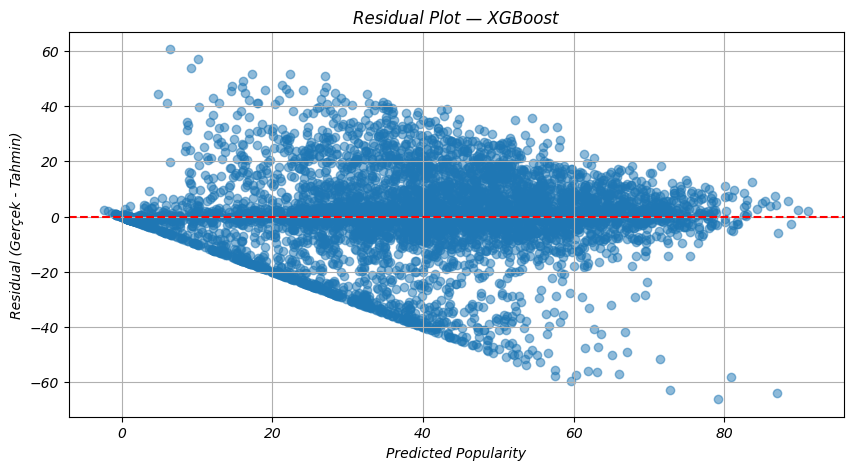

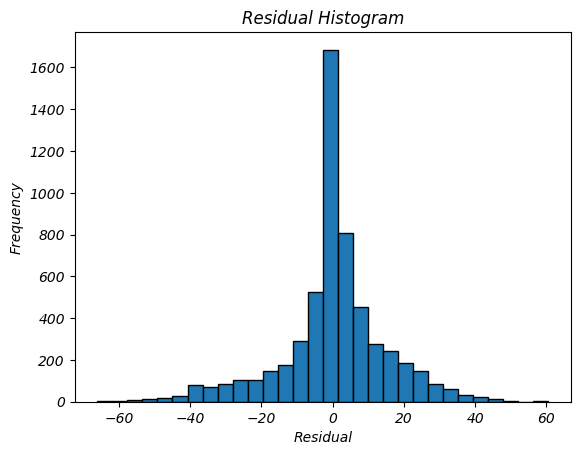

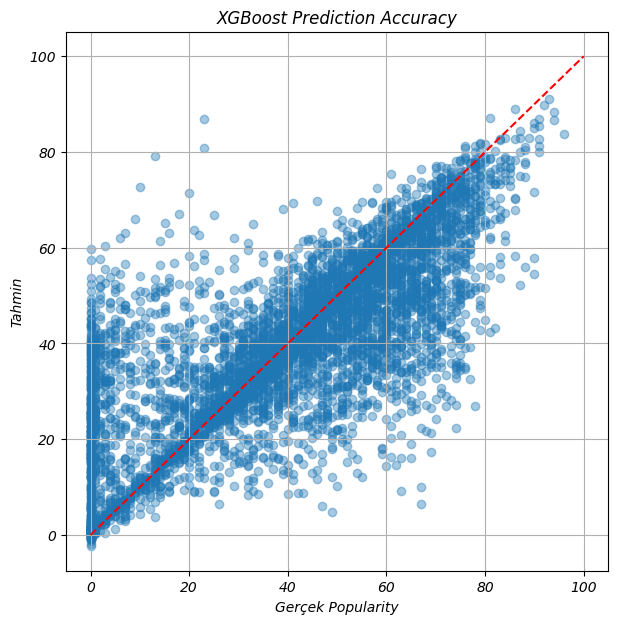

In [14]:
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Popularity")
plt.ylabel("Residual (Gerçek - Tahmin)")
plt.title("Residual Plot — XGBoost")
plt.grid(True)
plt.show()

plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residual Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0,100], [0,100], 'r--')
plt.xlabel("Gerçek Popularity")
plt.ylabel("Tahmin")
plt.title("XGBoost Prediction Accuracy")
plt.grid(True)
plt.show()

In [16]:
from joblib import dump

dump(best_xgb, "xgb_model.joblib")


['xgb_model.joblib']